# Test notebook

__Author:__ A. J. Tropiano [tropiano.4@osu.edu]<br/>
__Date:__ March 17, 2022

The purpose of this notebook is for testing out code and/or scripts.

_Last update:_ June 13, 2022

In [1]:
# Python imports
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

In [2]:
# Imports from A.T. codes
from scripts.potentials import Potential
from scripts.momentum_distributions import MomentumDistribution
from scripts.integration import momentum_mesh

Testing how NumPy's `savetxt` function works.

In [3]:
# # Get two arbitrary arrays
# x_array = np.arange(0.0, 10.1, 0.1)
# y_array = x_array**2

In [4]:
# X = np.asarray((x_array, y_array)).T
# print(X.ndim)
# print(X.shape[1])
# print(X.shape[0])

In [5]:
# file_name = 'test_file.txt'
# header = '{:<4s}\t{:<8s}'.format('x', 'x^2')
# np.savetxt(file_name, X, fmt=('%-4f', '%-8e'), delimiter='\t', header=header)

Showing contributions to proton momentum distribution and normalizations.

In [6]:
kvnn = 6
kmax, kmid, ntot = 15.0, 3.0, 120

In [7]:
# nucleus
nucleus_name = 'C12'
Z = 6
density = 'Gogny'

In [8]:
md = MomentumDistribution(kvnn, kmax, kmid, ntot)

n_functions = md.get_single_nucleon_momentum_distribution(
    'proton', nucleus_name, density, ('1S0', '3S1'), 'Wegner', 1.35,
    contributions=True, interpolate=True)

n_total_func, n_I_func, n_delU_func, n_delU2_func = n_functions

In [9]:
q_array, q_weights = momentum_mesh(kmax, kmid, ntot)
n_total_array = n_total_func(q_array)
n_I_array = n_I_func(q_array)
n_delU_array = n_delU_func(q_array)
n_delU2_array = n_delU2_func(q_array)

In [10]:
total_norm = 4*np.pi/(Z*(2*np.pi)**3)*np.sum(q_weights*q_array**2
                                             *n_total_array)
print(f'total = {total_norm}')

total = 0.9961983861261559


In [11]:
I_norm = 4*np.pi/(Z*(2*np.pi)**3)*np.sum(q_weights*q_array**2*n_I_array)
print(f'I term = {I_norm}')

I term = 0.9949355420154008


In [12]:
I_delU_norm = 4*np.pi/(Z*(2*np.pi)**3)*np.sum(q_weights*q_array**2
                                              *(n_I_array+n_delU_array))
print(f'I+\delta U = {I_delU_norm}')

I+\delta U = 0.8491084219476669


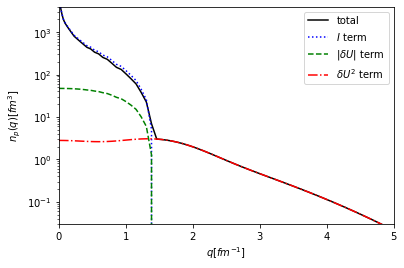

In [13]:
plt.semilogy(q_array, n_total_array, 'k-', label='total')
plt.semilogy(q_array, n_I_array, 'b:', label=r'$I$ term')
plt.semilogy(q_array, abs(n_delU_array), 'g--', label=r'$|\delta U|$ term')
plt.semilogy(q_array, n_delU2_array, 'r-.', label=r'$\delta U^2$ term')
plt.xlabel(r'$q [fm^{-1}]$')
plt.ylabel(r'$n_p(q) [fm^3]$')
plt.legend()
plt.xlim(0,5)
plt.ylim(3e-2, 4e3);